**<h1> Exercise 1.2 </h1>**

In [23]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [24]:
a, b = 0, 10
f = lambda x: np.exp(-x) / (1 + (x-1)**2)
I_ref, _ = integrate.quad(f, a, b)

In [25]:
I = lambda X, N: f(X).sum() * (b-a) / N

**Exercise 1.1 (a)**

In [26]:
def estimate_error(n, N):

    Ilist = []
    for _ in range(n):
        U = np.random.uniform(low=a, high=b, size=N)
        Ilist.append(I(U, N))

    errors = np.abs(np.array(Ilist) - I_ref)
    mean_error = np.sum(errors)/n
    
    return mean_error

In [27]:
n = 100
Nlist = np.arange(1000, 100000 + 1000, 1000)
error_list = np.array([estimate_error(n, N) for N in Nlist])

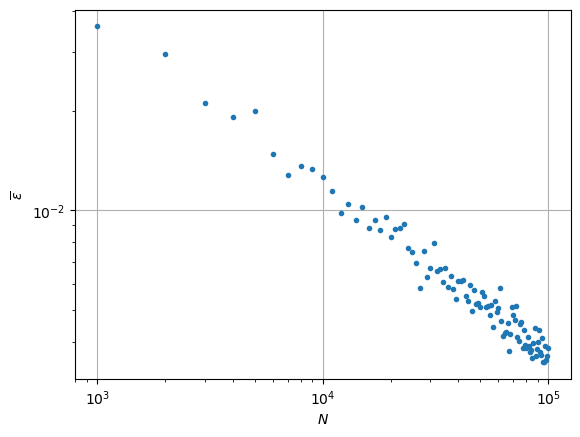

In [28]:
fig, ax = plt.subplots()
ax.plot(Nlist, error_list, '.')
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel("$N$")
ax.set_ylabel("$\overline{\epsilon}$")
ax.grid()

log-log scale linear function with gradient -1/2  $\implies$  mean error $\bar{\epsilon} \sim \frac{1}{\sqrt{N}}$  <br /> <br />

**Exercise 1.1 (b)**

In [37]:
alpha = 1.46
g = lambda x: alpha*np.exp(-alpha*x)
cdf_inverse = lambda u: np.log(1/(1-u)) /alpha

In [38]:
I = lambda X, N: (f(X)/g(X)).sum() / N

In [39]:
def estimate_error(n, N):

    Ilist = []    
    for _ in range(n):
        U = np.random.uniform(low=0, high=1, size=N)
        Ilist.append(I(cdf_inverse(U), N))

    errors = np.abs(np.array(Ilist) - I_ref)
    mean_error = np.sum(errors)/n
    
    return mean_error

In [40]:
n = 100
Nlist = np.arange(1000, 100000 + 1000, 1000)
error_list = np.array([estimate_error(n, N) for N in Nlist])

/var/folders/pr/vr1bzx8s7dl68c3ykzmr4v1c0000gn/T/ipykernel_3063/1806661554.py:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(10**(-4), 10**(-2), 10**(-1))


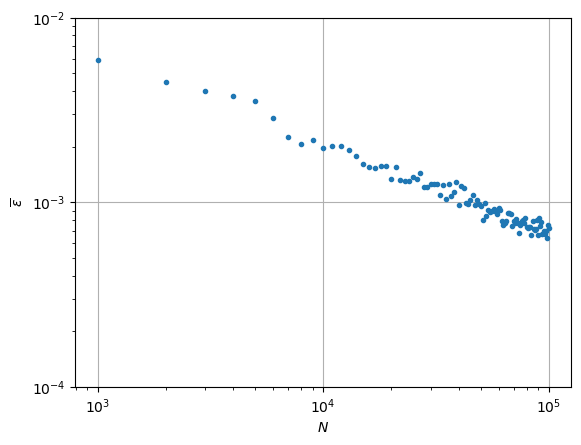

In [43]:
fig, ax = plt.subplots()
ax.plot(Nlist, error_list, '.')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**(-4), 10**(-2), 10**(-1))
ax.set_xlabel("$N$")
ax.set_ylabel("$\overline{\epsilon}$")
ax.grid()

Same scaling as before, but with a offset of $\approx 10^{5/4}$, i.e. the accuracy is greatly increased for the same $N$ w.r.t. to (a)